# KNN Exercises

### Create a new notebook, knn_model, and work with the titanic dataset to answer the following:

#### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

#### 2. Evaluate your results using the model score, confusion matrix, and classification report.

#### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

#### 4. Run through steps 1-3 setting k to 10

#### 5. Run through steps 1-3 setting k to 20

#### 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

#### 7. Which model performs best on our out-of-sample data from validate?

> ### Lesson Example

# KNN Exercises

### Libraries

In [4]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import acquire
import prepare

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

from pydataset import data

### Acquire

In [5]:
titanic = acquire.get_titanic_data()

### Prepare

In [6]:
titanic = prepare.prep_titanic(titanic)
titanic = titanic.drop(columns=['sex', 'embark_town','age'])

### Verify

In [7]:
titanic.isna().sum()

survived                   0
pclass                     0
sibsp                      0
parch                      0
fare                       0
alone                      0
sex_male                   0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

### Split

In [8]:
train_validate, test = train_test_split(titanic,train_size=.8,random_state=123)
train, validate = train_test_split(titanic,train_size=.7,random_state=123,stratify=titanic.survived)

### Divide/Seperate Target

In [9]:
X_train = train.drop(columns=['survived'])
y_train = train['survived']

X_validate = validate.drop(columns=['survived'])
y_validate = validate['survived']

X_test = test.drop(columns=['survived'])
y_test = test['survived']

X_train.shape

(623, 8)

In [ ]:
# Write a baseline function

#### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)

In [11]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [12]:
knn.score(X_train,y_train)

0.812199036918138

In [13]:
knn.score(X_validate,y_validate)

0.7276119402985075

In [14]:
num_neighbors = []
train_accuracy = []
val_accuracy = []

for i in range(1,11,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    num_neighbors.append(i)
    train_accuracy.append(knn.score(X_train,y_train))
    val_accuracy.append(knn.score(X_validate,y_validate))

In [38]:
knn_peformance = pd.DataFrame({'neighbors':num_neighbors,
             'train_accuracy':train_accuracy,
             'val_accuracy':val_accuracy})
knn_peformance

,neighbors,train_accuracy,val_accuracy
0,1,0.913323,0.697761
1,3,0.845907,0.690299
2,5,0.812199,0.727612
3,7,0.789727,0.727612
4,9,0.776886,0.708955


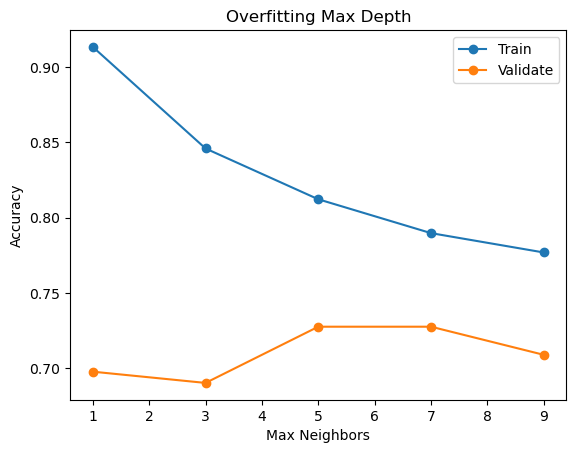

In [17]:
plt.plot(knn_peformance.neighbors, knn_peformance.train_acc, marker = 'o', label = 'Train')
plt.plot(knn_peformance.neighbors, knn_peformance.val_acc, marker = 'o', label = 'Validate')
plt.title('Overfitting Max Depth')
plt.xlabel('Max Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
y_pred = knn.predict(X_train)

#### 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [19]:
knn.score(X_train,y_train)

0.7768860353130016

In [20]:
confusion_matrix(y_train, y_pred)

array([[319,  65],
       [ 74, 165]])

In [21]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       384
           1       0.72      0.69      0.70       239

    accuracy                           0.78       623
   macro avg       0.76      0.76      0.76       623
weighted avg       0.78      0.78      0.78       623



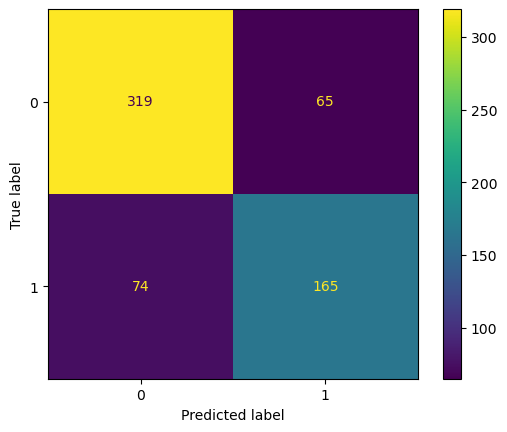

In [25]:
plot_confusion_matrix(knn, X_train, y_train)
plt.show()

#### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [16]:
def get_metrics(X_train, y_train):
    y_pred = knn.predict(X_train)
    
    TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
    ALL = TP + FP + FN + TN
    accuracy = (TP + TN)/ALL

    true_pos_rate = TP/(FN+TP)
    false_pos_rate = FP/(TN+FP)
    true_neg_rate = TN/(TN+FP)
    false_neg_rate = FN/(TP+FN)

    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1_formula = TP/(TP+(.5*(FP+FN)))
    support_pos = TP + FN
    support_neg = FP + TN
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"True Positive Rate: {true_pos_rate:.2f}")
    print(f"False Positive Rate: {false_pos_rate:.2f}")
    print(f"True Negative Rate: {true_neg_rate:.2f}")
    print(f"False Negative Rate: {false_neg_rate:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1_formula:.2f}")
    print(f"Support: {support_pos}")

In [50]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
ALL = TP + FP + FN + TN
accuracy = (TP + TN)/ALL

true_pos_rate = TP/(FN+TP)
false_pos_rate = FP/(TN+FP)
true_neg_rate = TN/(TN+FP)
false_neg_rate = FN/(TP+FN)

precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_formula = TP/(TP+(.5*(FP+FN)))
support_pos = TP + FN
support_neg = FP + TN
f1_score = 2 * (precision*recall) / (precision+recall)

In [63]:
get_metrics(X_train,y_train)

Accuracy: 0.78
True Positive Rate: 0.69
False Positive Rate: 0.17
True Negative Rate: 0.83
False Negative Rate: 0.31
Precision: 0.72
Recall: 0.69
F1: 0.70
Support: 239


#### 4. Run through steps 1-3 setting k to 10

In [17]:
num_neighbors = []
train_accuracy = []
val_accuracy = []

for i in range(1,13,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    num_neighbors.append(i)
    train_accuracy.append(knn.score(X_train,y_train))
    val_accuracy.append(knn.score(X_validate,y_validate))
    print(f"Using {i} neighbors: ")
    get_metrics(X_train,y_train)
    print()

Using 1 neighbors: 
Accuracy: 0.91
True Positive Rate: 0.85
False Positive Rate: 0.04
True Negative Rate: 0.96
False Negative Rate: 0.15
Precision: 0.92
Recall: 0.85
F1: 0.88
Support: 239

Using 3 neighbors: 
Accuracy: 0.85
True Positive Rate: 0.77
False Positive Rate: 0.11
True Negative Rate: 0.89
False Negative Rate: 0.23
Precision: 0.82
Recall: 0.77
F1: 0.79
Support: 239

Using 5 neighbors: 
Accuracy: 0.81
True Positive Rate: 0.70
False Positive Rate: 0.12
True Negative Rate: 0.88
False Negative Rate: 0.30
Precision: 0.79
Recall: 0.70
F1: 0.74
Support: 239

Using 7 neighbors: 
Accuracy: 0.79
True Positive Rate: 0.68
False Positive Rate: 0.14
True Negative Rate: 0.86
False Negative Rate: 0.32
Precision: 0.75
Recall: 0.68
F1: 0.71
Support: 239

Using 9 neighbors: 
Accuracy: 0.78
True Positive Rate: 0.69
False Positive Rate: 0.17
True Negative Rate: 0.83
False Negative Rate: 0.31
Precision: 0.72
Recall: 0.69
F1: 0.70
Support: 239

Using 11 neighbors: 
Accuracy: 0.79
True Positive Rate:

#### 5. Run through steps 1-3 setting k to 20

In [69]:
num_neighbors = []
train_accuracy = []
val_accuracy = []

for i in range(1,23,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    num_neighbors.append(i)
    train_accuracy.append(knn.score(X_train,y_train))
    val_accuracy.append(knn.score(X_validate,y_validate))
    print(f"Using {i} neighbors: ")
    get_metrics(X_train,y_train)
    print()

Using 1 neighbors: 
Accuracy: 0.91
True Positive Rate: 0.85
False Positive Rate: 0.04
True Negative Rate: 0.96
False Negative Rate: 0.15
Precision: 0.92
Recall: 0.85
F1: 0.88
Support: 239

Using 3 neighbors: 
Accuracy: 0.85
True Positive Rate: 0.77
False Positive Rate: 0.11
True Negative Rate: 0.89
False Negative Rate: 0.23
Precision: 0.82
Recall: 0.77
F1: 0.79
Support: 239

Using 5 neighbors: 
Accuracy: 0.81
True Positive Rate: 0.70
False Positive Rate: 0.12
True Negative Rate: 0.88
False Negative Rate: 0.30
Precision: 0.79
Recall: 0.70
F1: 0.74
Support: 239

Using 7 neighbors: 
Accuracy: 0.79
True Positive Rate: 0.68
False Positive Rate: 0.14
True Negative Rate: 0.86
False Negative Rate: 0.32
Precision: 0.75
Recall: 0.68
F1: 0.71
Support: 239

Using 9 neighbors: 
Accuracy: 0.78
True Positive Rate: 0.69
False Positive Rate: 0.17
True Negative Rate: 0.83
False Negative Rate: 0.31
Precision: 0.72
Recall: 0.69
F1: 0.70
Support: 239

Using 11 neighbors: 
Accuracy: 0.79
True Positive Rate:

#### 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [19]:
knn_peformance = pd.DataFrame({'neighbors':num_neighbors,
             'train_accuracy':train_accuracy,
             'val_accuracy':val_accuracy})
knn_peformance

,neighbors,train_accuracy,val_accuracy
0,1,0.913323,0.697761
1,3,0.845907,0.690299
2,5,0.812199,0.727612
3,7,0.789727,0.727612
4,9,0.776886,0.708955
5,11,0.789727,0.708955


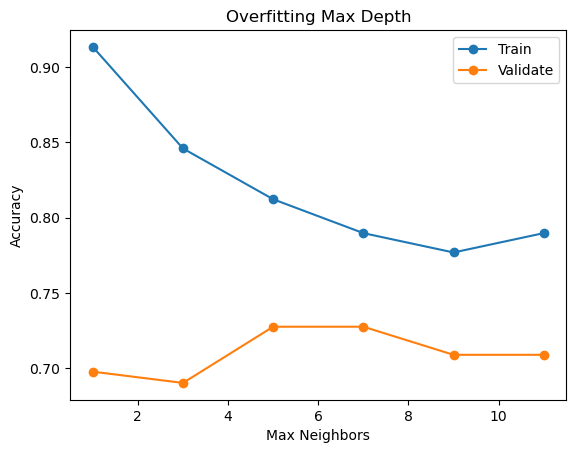

In [20]:
plt.plot(knn_peformance.neighbors, knn_peformance.train_accuracy, marker = 'o', label = 'Train')
plt.plot(knn_peformance.neighbors, knn_peformance.val_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Max Depth')
plt.xlabel('Max Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### 7. Which model performs best on our out-of-sample data from validate?

In [21]:
num_neighbors = []
train_accuracy = []
val_accuracy = []

for i in range(1,55,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    num_neighbors.append(i)
    train_accuracy.append(knn.score(X_train,y_train))
    val_accuracy.append(knn.score(X_validate,y_validate))
    print(f"Using {i} neighbors: ")
    print(f"Train Accuracy: {knn.score(X_train,y_train)}")
    print(f"Validate Accuracy: {knn.score(X_validate,y_validate)}")
    print()

Using 1 neighbors: 
Train Accuracy: 0.913322632423756
Validate Accuracy: 0.6977611940298507

Using 3 neighbors: 
Train Accuracy: 0.8459069020866774
Validate Accuracy: 0.6902985074626866

Using 5 neighbors: 
Train Accuracy: 0.812199036918138
Validate Accuracy: 0.7276119402985075

Using 7 neighbors: 
Train Accuracy: 0.7897271268057785
Validate Accuracy: 0.7276119402985075

Using 9 neighbors: 
Train Accuracy: 0.7768860353130016
Validate Accuracy: 0.7089552238805971

Using 11 neighbors: 
Train Accuracy: 0.7897271268057785
Validate Accuracy: 0.7089552238805971

Using 13 neighbors: 
Train Accuracy: 0.7688603531300161
Validate Accuracy: 0.6865671641791045

Using 15 neighbors: 
Train Accuracy: 0.7495987158908507
Validate Accuracy: 0.6716417910447762

Using 17 neighbors: 
Train Accuracy: 0.7479935794542536
Validate Accuracy: 0.6828358208955224

Using 19 neighbors: 
Train Accuracy: 0.7512038523274478
Validate Accuracy: 0.7014925373134329

Using 21 neighbors: 
Train Accuracy: 0.7479935794542536
V

In [22]:
knn_peformance = pd.DataFrame({'neighbors':num_neighbors,
             'train_accuracy':train_accuracy,
             'val_accuracy':val_accuracy})
knn_peformance['difference']=knn_peformance['train_accuracy']-knn_peformance['val_accuracy']

In [23]:
knn_peformance

,neighbors,train_accuracy,val_accuracy,difference
0,1,0.913323,0.697761,0.215561
1,3,0.845907,0.690299,0.155608
2,5,0.812199,0.727612,0.084587
3,7,0.789727,0.727612,0.062115
4,9,0.776886,0.708955,0.067931
5,11,0.789727,0.708955,0.080772
6,13,0.768860,0.686567,0.082293
7,15,0.749599,0.671642,0.077957
8,17,0.747994,0.682836,0.065158
9,19,0.751204,0.701493,0.049711


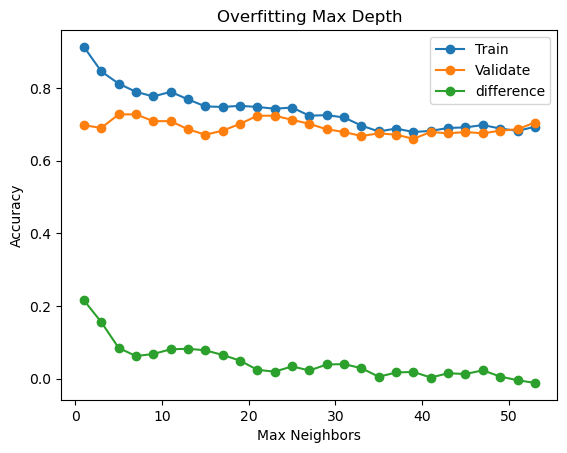

In [24]:
plt.plot(knn_peformance.neighbors, knn_peformance.train_accuracy, marker = 'o', label = 'Train')
plt.plot(knn_peformance.neighbors, knn_peformance.val_accuracy, marker = 'o', label = 'Validate')
plt.plot(knn_peformance.neighbors, knn_peformance.difference, marker = 'o', label = 'difference')

plt.title('Overfitting Max Depth')
plt.xlabel('Max Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()